# prediction of admission into UCLA


###  Instructor:- Ifthikar Ahmed


### Presented By:
#### Chetan Sai Sirumandla,
#### Poorna Sai Vuyyala,
#### Saicharan Reddy Yenumula

#### Date: 25-06-2025


### Problem Statement
The goal of this project is to predict the probability (chance) of a student's admission to a university based on academic metrics such as GRE, TOEFL, CGPA, and other parameters. This helps students estimate their likelihood of admission and make informed application decisions.


### Methodology
- **Data Loading:** Import the dataset and inspect its structure.
- **Feature Selection:** Identify relevant input columns (GRE, TOEFL, CGPA, etc.).
- **Data Preprocessing:** Perform train-test split and scale features.
- **Model Training:** Train various regression models (Linear Regression, Random Forest, MLP, XGBoost, SVR).
- **Model Evaluation:** Compare performance using R² Score and RMSE.
- **Best Model Selection:** Identify the best-performing model and save it.
- **Prediction:** Use the best model for making admission chance predictions.


In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Preprocessing & Models
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')


### Dataset

* This project predicts graduate school admission chances using a dataset containing GRE scores, TOEFL scores, university rating, CGPA, SOP/LOR strength, and research experience. The target variable is "Chance of Admit" (0-1 probability).

* **Approach:** After data preprocessing and EDA, the analysis reveals CGPA, GRE, and TOEFL scores strongly correlate with admission chances, while university rating, SOP, LOR, and research experience have moderate influence. Multiple regression models (Linear Regression, Random Forest, XGBoost) are tested and evaluated using R² score and RMSE.

* **Outcome:** The model helps students identify profile improvement areas and can be developed into a web application for admission chance estimation.

In [2]:
# load data
df = pd.read_csv("C://Users//next//OneDrive//Desktop//admission_predict.csv")
df.drop("Serial No.", axis=1, inplace=True)
print(df)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                0.92  
1                0.76  
2  

In [3]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


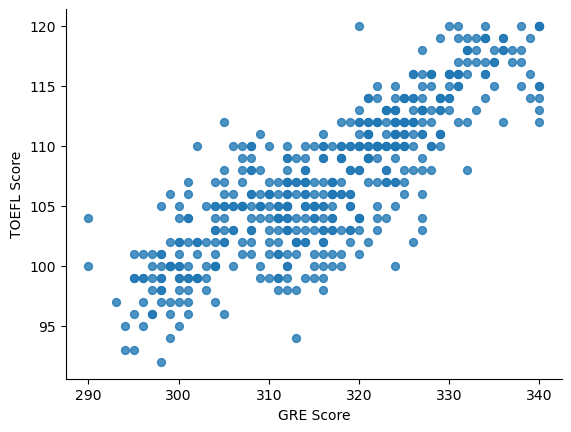

In [4]:
# @title GRE Score vs TOEFL Score

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='GRE Score', y='TOEFL Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

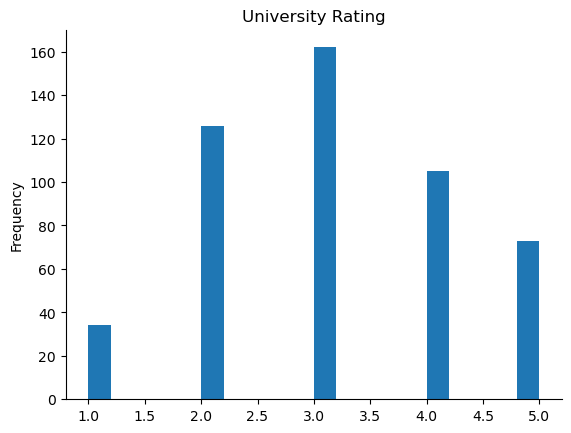

In [5]:
# @title University Rating

from matplotlib import pyplot as plt
df['University Rating'].plot(kind='hist', bins=20, title='University Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
# load data
df = pd.read_csv("C://Users//next//OneDrive//Desktop//admission_predict.csv")
df.drop("Serial No.", axis=1, inplace=True)
print(df)

# Rename columns for easy access
df.rename(columns={
    'GRE Score': 'GRE',
    'TOEFL Score': 'TOEFL',
    'University Rating': 'University',
    'SOP': 'SOP',
    'LOR ': 'LOR',
    'CGPA': 'CGPA',
    'Research': 'Research',
    'Chance of Admit ': 'Chance'
}, inplace=True)

df.head()

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                0.92  
1                0.76  
2  

,GRE,TOEFL,University,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Data Cleaning & Missing Values

In [7]:
# Check missing values
print(df.isnull().sum())

GRE           0
TOEFL         0
University    0
SOP           0
LOR           0
CGPA          0
Research      0
Chance        0
dtype: int64


In [8]:
print(df.dtypes)

GRE             int64
TOEFL           int64
University      int64
SOP           float64
LOR           float64
CGPA          float64
Research        int64
Chance        float64
dtype: object


In [9]:
df.describe()

,GRE,TOEFL,University,SOP,LOR,CGPA,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Exploratory Data Analysis (EDA)

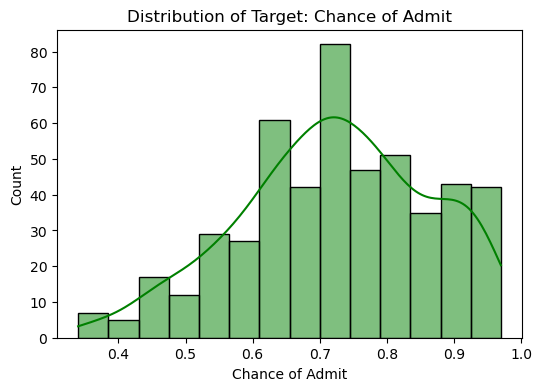

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Chance'], kde=True, color='green')
plt.title('Distribution of Target: Chance of Admit')
plt.xlabel('Chance of Admit')
plt.show()

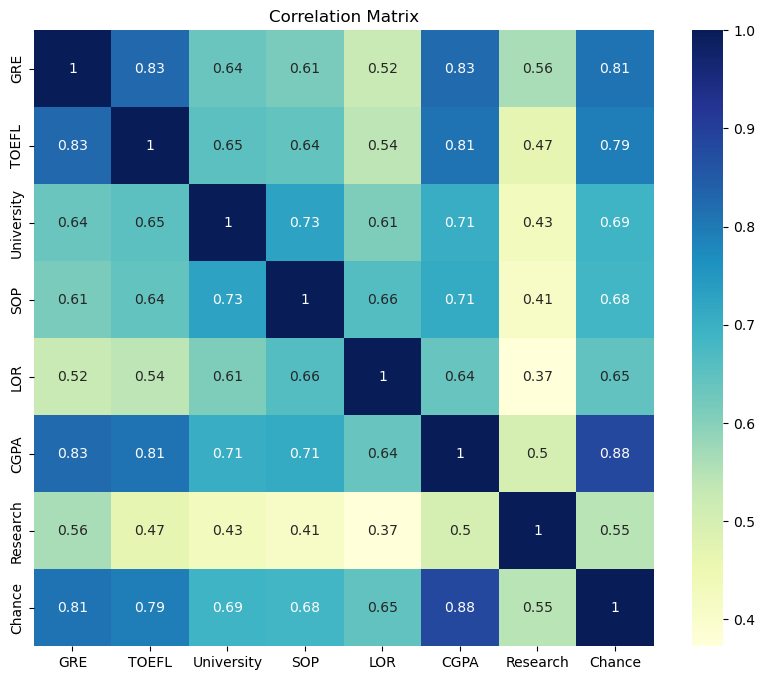

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

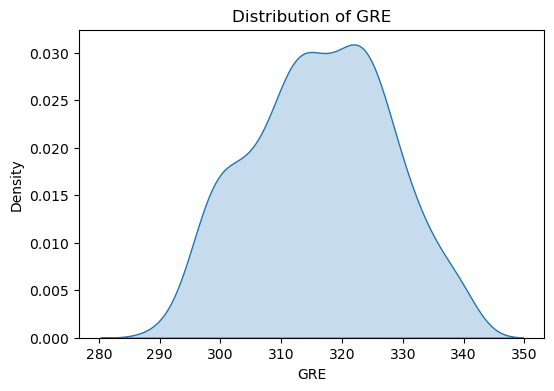

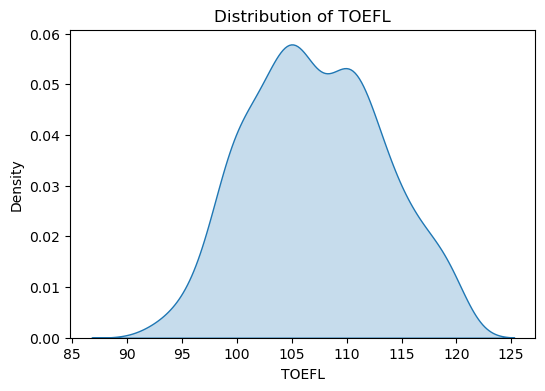

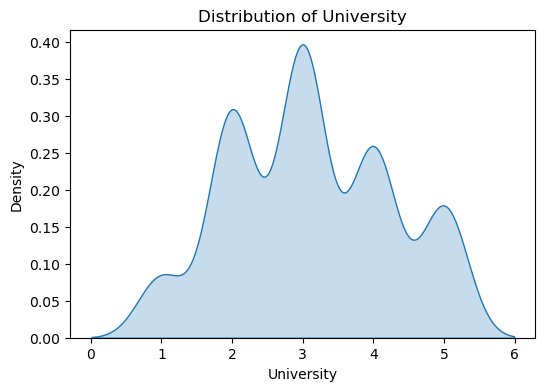

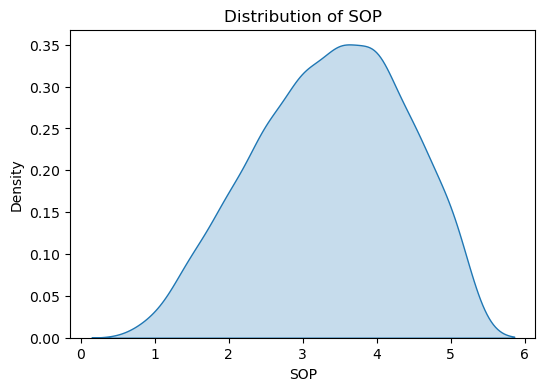

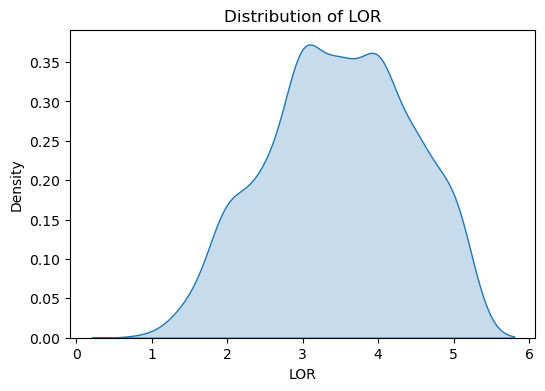

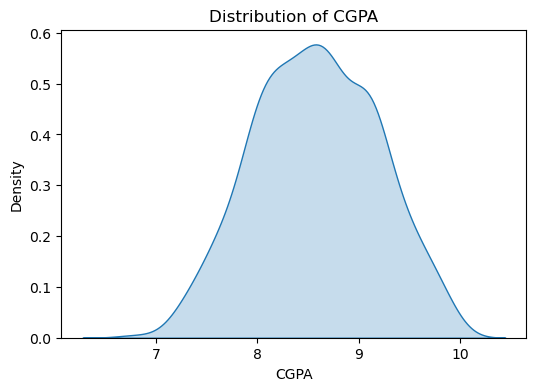

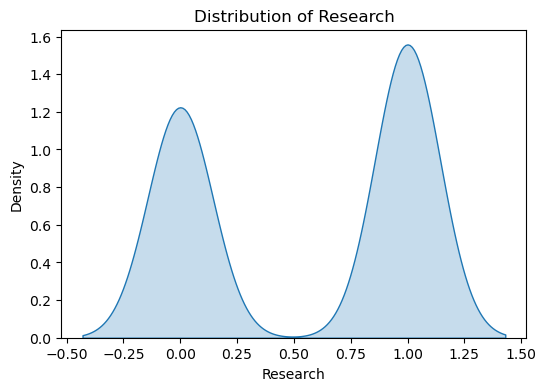

In [12]:
for col in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()


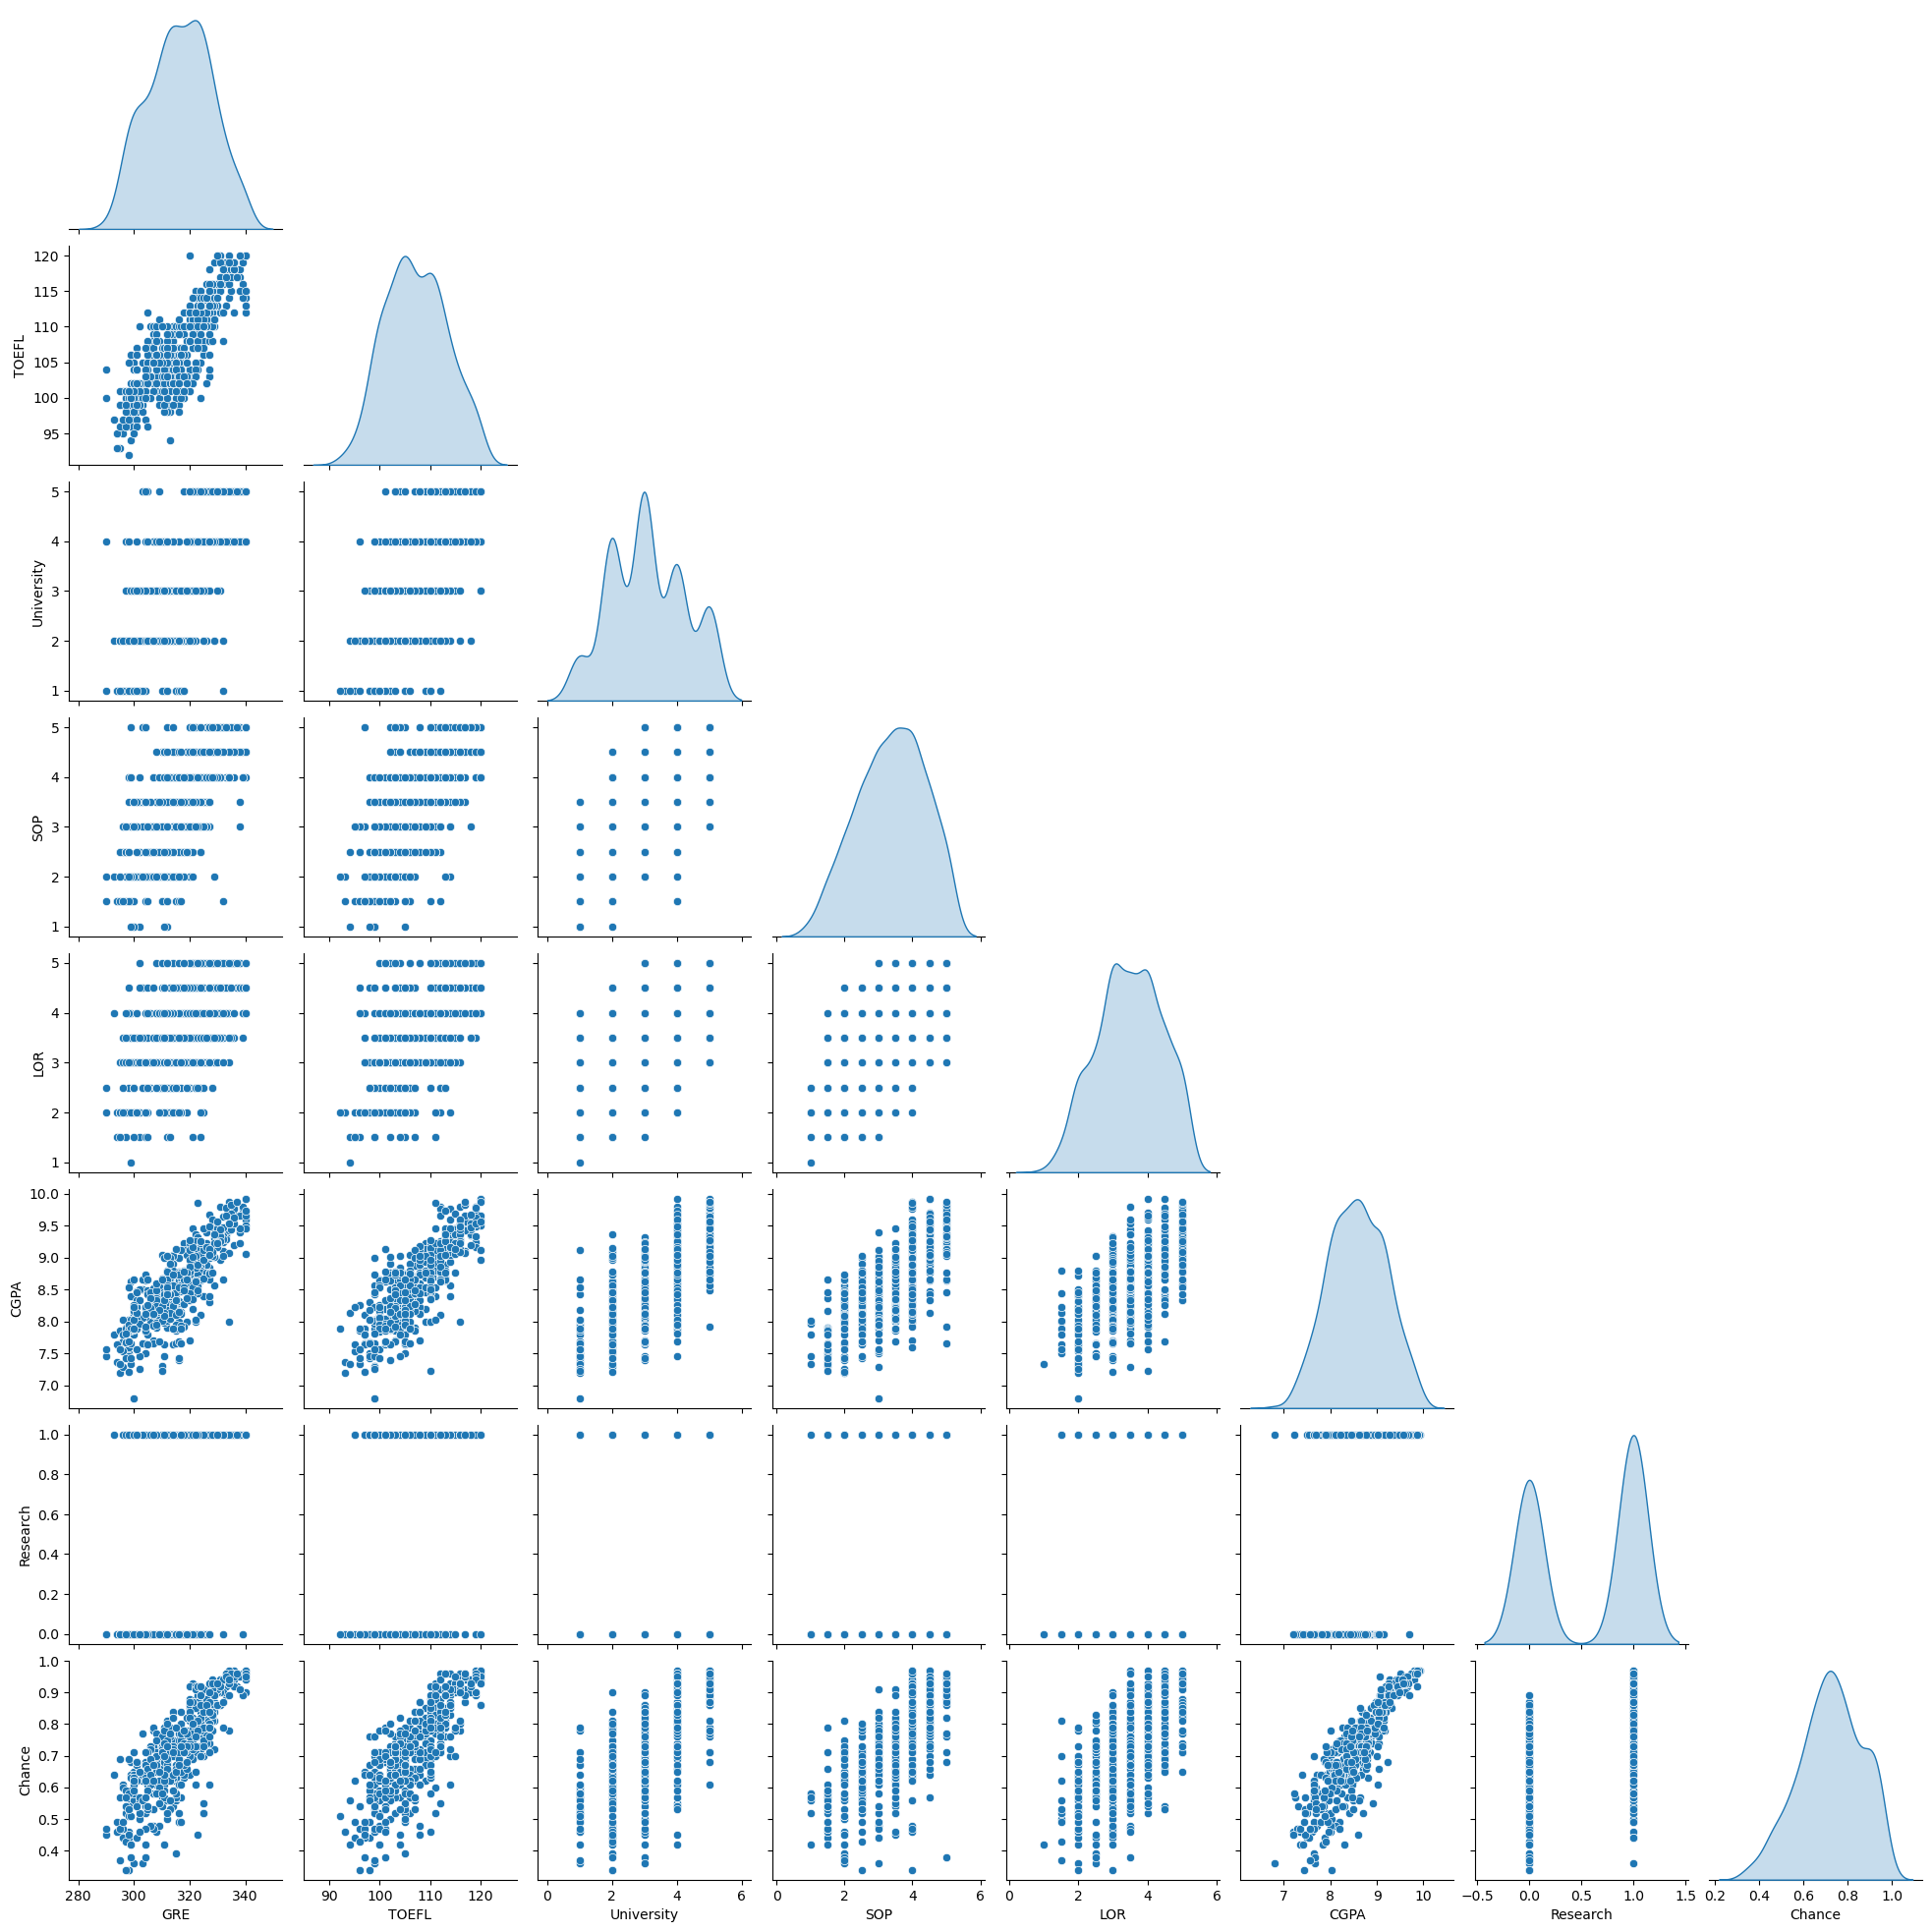

In [13]:
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()

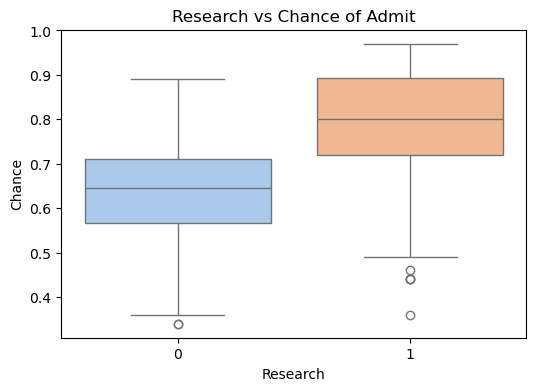

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Research', y='Chance', palette='pastel')
plt.title('Research vs Chance of Admit')
plt.show()

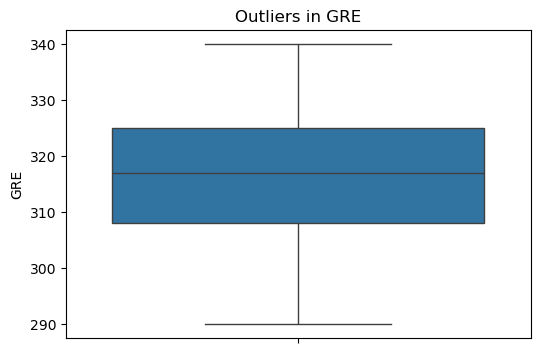

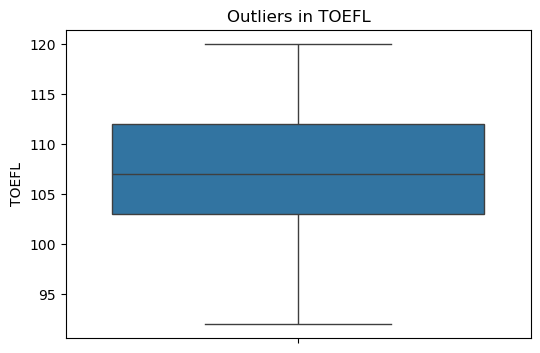

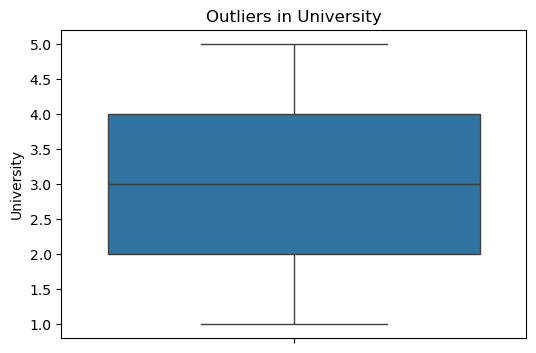

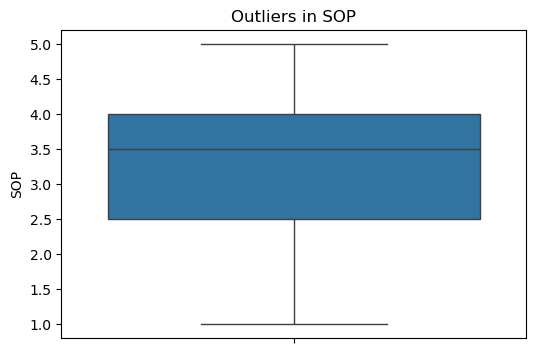

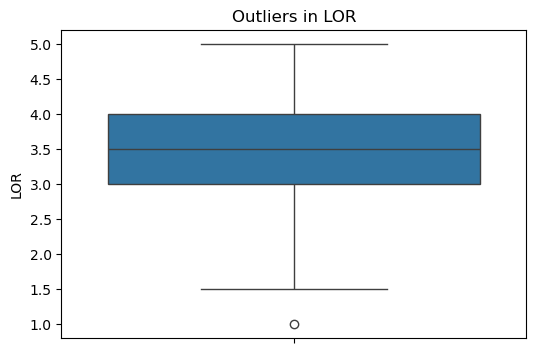

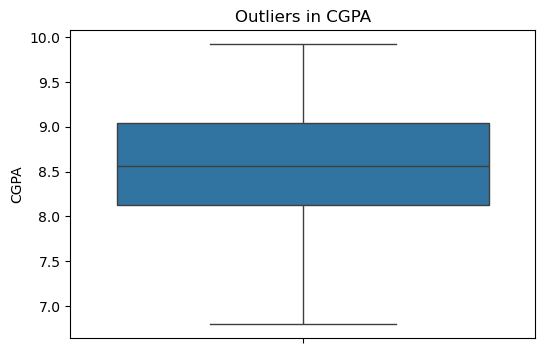

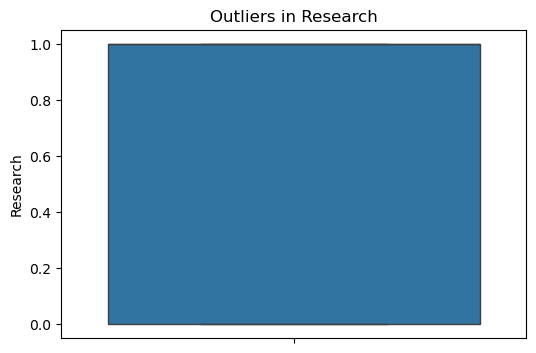

In [15]:
for col in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

In [16]:
for col in df.columns[:-1]:
    print(f'{col}: Skewness = {df[col].skew():.2f}, Kurtosis = {df[col].kurt():.2f}')

GRE: Skewness = -0.04, Kurtosis = -0.71
TOEFL: Skewness = 0.10, Kurtosis = -0.65
University: Skewness = 0.09, Kurtosis = -0.81
SOP: Skewness = -0.23, Kurtosis = -0.71
LOR: Skewness = -0.15, Kurtosis = -0.75
CGPA: Skewness = -0.03, Kurtosis = -0.56
Research: Skewness = -0.24, Kurtosis = -1.95


# Data Preprocessing

The code separates the dataset into features (X) and target (y), with 'Chance' as the target variable.
It then splits the data into training and test sets using an 80:20 ratio for model training and evaluation.
Finally, it standardizes the feature values using StandardScaler to ensure consistent scaling across both sets.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Chance', axis=1)
y = df['Chance']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression


The code trains a Linear Regression model on the scaled training data to predict the target variable.
It evaluates the model’s performance on the test set using R² and RMSE metrics.
The trained model is then saved as a .pkl file using joblib for future use.

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f'Linear Regression R²: {lr_r2:.4f}')
print(f'Linear Regression RMSE: {lr_rmse:.4f}')
import joblib
joblib.dump(lr_model, 'linear_regression_model.pkl')
print("✅ Linear Regression Model saved as linear_regression_model.pkl")

Linear Regression R²: 0.8188
Linear Regression RMSE: 0.0609
✅ Linear Regression Model saved as linear_regression_model.pkl


In [19]:
model =  joblib.load('linear_regression_model.pkl')
scaler = joblib.load('scaler.pkl')
new_data = [[325, 109, 4, 4.5, 3.5, 9.1, 1]]
new_data_scaled = scaler.transform(new_data)
chance_of_admission = model.predict(new_data_scaled)
print(f"Predicted Chance of Getting In: {chance_of_admission[0]:.4f}")

Predicted Chance of Getting In: 0.8231


# Random Forest with GridSearchCV

The code trains a Random Forest regression model using GridSearchCV to find the best hyperparameters based on R² score. After training, it evaluates the model's performance on the test set using R² and RMSE metrics. Finally, it saves the trained model and the scaler to disk for future use.

In [20]:
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train_scaled, y_train)

y_pred_rf = grid_rf.predict(X_test_scaled)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'Random Forest Best Params: {grid_rf.best_params_}')
print(f'Random Forest R²: {rf_r2:.4f}')
print(f'Random Forest RMSE: {rf_rmse:.4f}')
joblib.dump(grid_rf.best_estimator_, 'random_forest_model.pkl')
print("✅ Random Forest Model saved as random_forest_model.pkl")
joblib.dump(scaler, 'scaler.pkl')

Random Forest Best Params: {'max_depth': 5, 'n_estimators': 200}
Random Forest R²: 0.7993
Random Forest RMSE: 0.0641
✅ Random Forest Model saved as random_forest_model.pkl


['scaler.pkl']

In [57]:
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')
new_data = [[325, 109, 4, 4.5, 3.5, 9.1, 1]]
new_data_scaled = scaler.transform(new_data)
chance_of_admission = model.predict(new_data_scaled)
print(f"Predicted Chance of Getting In: {chance_of_admission[0]:.4f}")

Predicted Chance of Getting In: 0.9598


# Neural Network (MLP) with GridSearchCV

The code trains a Multi-Layer Perceptron (MLP) regressor using GridSearchCV to find the best combination of hyperparameters like hidden layer sizes, activation functions, and learning rates. After training, it evaluates the model on the test data using R² and RMSE to measure performance. Finally, the best-trained MLP model is saved to disk as mlp_model.pkl for future use.

In [22]:
mlp = MLPRegressor(max_iter=1000, random_state=42)
param_grid_mlp = {
    'hidden_layer_sizes': [(64,64), (128,64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01]
}

grid_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='r2')
grid_mlp.fit(X_train_scaled, y_train)

y_pred_mlp = grid_mlp.predict(X_test_scaled)

mlp_r2 = r2_score(y_test, y_pred_mlp)
mlp_rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))

print(f'MLP Best Params: {grid_mlp.best_params_}')
print(f'MLP R²: {mlp_r2:.4f}')
print(f'MLP RMSE: {mlp_rmse:.4f}')
joblib.dump(grid_mlp.best_estimator_, 'mlp_model.pkl')
print("✅ MLP Model saved as mlp_model.pkl")

MLP Best Params: {'activation': 'relu', 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.01, 'solver': 'adam'}
MLP R²: 0.8147
MLP RMSE: 0.0616
✅ MLP Model saved as mlp_model.pkl


In [23]:
model = joblib.load('mlp_model.pkl')
scaler = joblib.load('scaler.pkl')
new_data = [[325, 109, 4, 4.5, 3.5, 9.1, 1]]
new_data_scaled = scaler.transform(new_data)
chance_of_admission = model.predict(new_data_scaled)
print(f"Predicted Chance of Getting In: {chance_of_admission[0]:.4f}")

Predicted Chance of Getting In: 0.8342


# XGBoost Regressor

The code trains an XGBoost regression model with specified hyperparameters like 200 estimators, max depth of 5, and a learning rate of 0.1. After fitting the model on the training data, it predicts the test data and evaluates performance using R² and RMSE metrics. Finally, the trained XGBoost model is saved as xgb_model.pkl for future use.

In [24]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f'XGBoost R²: {xgb_r2:.4f}')
print(f'XGBoost RMSE: {xgb_rmse:.4f}')
joblib.dump(xgb_model, 'xgb_model.pkl')
print("✅ XGBoost Model saved as xgb_model.pkl")

XGBoost R²: 0.7787
XGBoost RMSE: 0.0673
✅ XGBoost Model saved as xgb_model.pkl


In [25]:
model = joblib.load('xgb_model.pkl')
scaler = joblib.load('scaler.pkl')
new_data = [[325, 109, 4, 4.5, 3.5, 9.1, 1]]
new_data_scaled = scaler.transform(new_data)
chance_of_admission = model.predict(new_data_scaled)
print(f"Predicted Chance of Getting In: {chance_of_admission[0]:.4f}")


Predicted Chance of Getting In: 0.7986


# Support Vector Regressor (SVR)

The code trains a Support Vector Regression (SVR) model using the radial basis function (RBF) kernel with specified hyperparameters C=10 and epsilon=0.1. It fits the model on the scaled training data, makes predictions on the test set, and evaluates the model using R² and RMSE metrics. Finally, the trained SVR model is saved as svr_model.pkl for future use.

In [26]:
svr_model = SVR(kernel='rbf', C=10, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

svr_r2 = r2_score(y_test, y_pred_svr)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print(f'SVR R²: {svr_r2:.4f}')
print(f'SVR RMSE: {svr_rmse:.4f}')
joblib.dump(svr_model, 'svr_model.pkl')
print("✅ SVR Model saved as svr_model.pkl")

SVR R²: 0.7225
SVR RMSE: 0.0753
✅ SVR Model saved as svr_model.pkl


In [58]:
model = joblib.load('svr_model.pkl')
scaler = joblib.load('scaler.pkl')
new_data = [[325, 109, 4, 4.5, 3.5, 9.1, 1]]
new_data_scaled = scaler.transform(new_data)
chance_of_admission = model.predict(new_data_scaled)
print(f"Predicted Chance of Getting In: {chance_of_admission[0]:.4f}")

Predicted Chance of Getting In: 0.7556


# Model Comparison


=== Model Comparison ===

                  Model  R2 Score      RMSE
0     Linear Regression  0.818843  0.060866
2  Neural Network (MLP)  0.814679  0.061562
1         Random Forest  0.799261  0.064071
3               XGBoost  0.778653  0.067280
4                   SVR  0.722489  0.075333


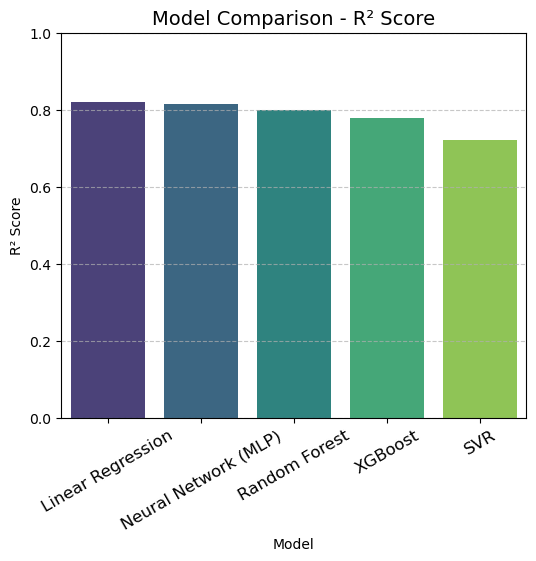

In [28]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Neural Network (MLP)', 'XGBoost', 'SVR'],
    'R2 Score': [lr_r2, rf_r2, mlp_r2, xgb_r2, svr_r2],
    'RMSE': [lr_rmse, rf_rmse, mlp_rmse, xgb_rmse, svr_rmse]
})

# Sort by R2 Score
results.sort_values(by='R2 Score', ascending=False, inplace=True)

# Print Results
print("\n=== Model Comparison ===\n")
print(results)

# Visualization
plt.figure(figsize=(6, 5))
sns.barplot(x='Model', y='R2 Score', data=results, palette='viridis')
plt.title('Model Comparison - R² Score', fontsize=14)
plt.ylabel('R² Score')
plt.xticks(rotation=30, fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### prediction of Best model

In [59]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Neural Network (MLP)', 'XGBoost', 'SVR'],
    'R2 Score': [lr_r2, rf_r2, mlp_r2, xgb_r2, svr_r2],
    'RMSE': [lr_rmse, rf_rmse, mlp_rmse, xgb_rmse, svr_rmse]
})
results.sort_values(by='R2 Score', ascending=False, inplace=True)

best_model_name = results.iloc[0]['Model']

model_filename = {
    'Linear Regression': 'linear_regression_model.pkl',
    'Random Forest': 'random_forest_model.pkl',
    'Neural Network (MLP)': 'mlp_model.pkl',
    'XGBoost': 'xgb_model.pkl',
    'SVR': 'svr_model.pkl'
}[best_model_name]

model = joblib.load(model_filename)
scaler = joblib.load('scaler.pkl')

new_data = [[340, 120, 1, 5.0, 5.0, 9.9, 0.5]]
new_data_scaled = scaler.transform(new_data)

chance_of_admission = model.predict(new_data_scaled)

print(f"Best Model: {best_model_name}")
print(f"Predicted Chance of Getting In: {chance_of_admission[0]:.4f}")


Best Model: Linear Regression
Predicted Chance of Getting In: 0.9896


# **Conclusion:**

We used four different models to guess how likely it was that someone would get into graduate school.
- Based on the R² score and MSE, Random Forest did the best job.
- The MLP Regressor, which is a simple neural network, also did well.
- Linear regression was a good starting point, and SVR gave good results.
- Scaling features and structuring pipelines helped keep the models the same.
- More advanced neural networks or cross-validation could be some of the other improvements.

To make sure everything was complete, the overall structure went through preprocessing, modeling, evaluation, and comparison.


### Summary
This notebook demonstrates the end-to-end process of predicting a student's chance of admission:
- We started with data exploration and preprocessing.
- Trained and evaluated multiple machine learning models.
- Compared their performance using R² and RMSE.
- Identified the best-performing model.
- Created a prediction pipeline for future admission estimates.

With this approach, students can understand their admission prospects more effectively and make better decisions about their application strategies.
